### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [718]:
## Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Understanding and Prepration

In [719]:
# csv data
house_data = pd.read_csv("C:\\Users\\arun.cv\\Documents\\GenAI\\Projects\\Advanced Regression\\train.csv")
## house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [720]:
# Columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [721]:
# dataframe shape
house_data.shape

(1460, 81)

In [722]:
# dataframe model description 
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [723]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [724]:
# check for null column
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [725]:
# drop column with maximum missing values
house_data = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])

In [726]:
house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [727]:
house_data.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [728]:
house_data.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [729]:
house_data.isnull().sum()[house_data.isnull().sum()>0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [730]:
house_data=house_data.drop(columns=['Alley'])
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [731]:
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [732]:
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [733]:
house_data.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [734]:
#check median for LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [735]:
# Add missing values for LotFrontage with median due value to some outliers in data 
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [736]:
# Add missing values for MasVnrArea with median due to some outliers in data
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())

In [737]:
# replacing Nan values with None
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [738]:
# replace Nan values with NA
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [739]:
#replace Nan values with NA
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [740]:
#replace Nan values with No
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [741]:
#replace Nan values with NA
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [742]:
#replace Nan values with NA
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [743]:
# Add missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [744]:
#replace Nan values with NA
house_data.GarageType = house_data.GarageType.fillna('NA')

In [745]:
#replace Nan values with 0
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [746]:
#replace Nan values with NA
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [747]:
#replace Nan values with NA
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [748]:
#replace Nan values with NA
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [749]:
#replace Nan values with NA
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [750]:
#check missing values
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [751]:
#calculate the age of house ==> YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [752]:
# Drop YrSold, YearBuilt after adding HouseAge column
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [753]:
# convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [754]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [755]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [756]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [757]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [758]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [759]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [760]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [761]:
house_data.ExterQual.value_counts()

ExterQual
3    906
4    488
5     52
2     14
Name: count, dtype: int64

In [762]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [763]:
for c in house_data.columns:
    if house_data[c].dtype == np :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: flo

In [764]:
# Drop columns which have bias data more than 80% 
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [765]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [766]:
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


In [767]:
# create dumy variable
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')

# concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [768]:
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning').astype(int)
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [769]:
# concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0


In [770]:
# create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [771]:
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False


In [772]:
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [773]:
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,True
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,True,False,False


In [774]:
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [775]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,True,False,False,False,Fals

In [776]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,

In [777]:
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,3

In [778]:
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,True,F

In [779]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,

In [780]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,

In [781]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,Fal

In [782]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,

In [783]:
house_data.shape

(1460, 162)

In [784]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [785]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: bool(103), float64(3), int32(4), int64(39)
memory usage: 648.9 KB


In [786]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [787]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.691479,3.593536,448.165524,50.087169,563.745348,1061.998041,4.150833,1168.611166,343.540646,5.999021,1518.150833,0.439765,0.059745,1.567091,0.377081,2.856024,1.053869,3.511263,6.504407,0.598433,1.798237,1868.316357,1.771792,471.995103,92.641528,47.035260,23.241920,3.940255,14.047013,2.149853,48.711068,6.288932,180609.596474,36.497551,0.044074,0.012733,0.785504,0.150833
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.058956,2.114914,465.115135,170.847470,448.739203,459.098042,0.974565,397.896911,435.498994,48.207914,531.849898,0.525381,0.241230,0.551872,0.500807,0.819993,0.230169,0.659114,1.605514,0.645769,1.825859,455.160037,0.746119,212.213075,124.479090,66.195468,63.167621,32.333667,51.081766,34.524133,578.364428,2.748576,79099.444132,30.346064,0.205361,0.112173,0.410673,0.358061
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,216.000000,793.000000,3.000000,876.000000,0.000000,0.000000,1135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1958.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,129500.000000,8.000000,0.000000,0.000000,1.000000,0.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,392.000000,0.000000,462.000000,994.000000,5.000000,1086.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,1978.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,161000.000000,34.000000,0.000000,0.000000,1.000000,0.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,712.000000,0.000000,806.000000,1314.000000,5.000000,1422.000000,728.000000,0.000000,1774.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,4.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,215000.000000,54.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,5644.000000,1474.000000,2336.000000,6110.000000,5.000000,4692.000000,2065.000000,515.000000,5642.000000,3.000000,2.00000

In [788]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,Fals

In [789]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000
mean,-1.043892e-17,-7.655211e-17,-2.696722e-16,1.539741e-16,-8.420732e-16,-6.611318e-17,1.243972e-16,1.287467e-16,6.263354e-17,8.612112e-17,-6.437336e-17,-1.870307e-17,-1.304865e-17,1.879006e-16,-3.270863e-16,0.000000,-6.350345e-17,-1.130883e-17,-5.915390e-17,4.871498e-17,-5.219462e-18,6.611318e-17,4.784507e-17,-3.479641e-18,3.862402e-16,3.070783e-16,-2.392253e-16,9.395031e-17,-2.435749e-17,2.296563e-16,7.481229e-17,-9.569013e-17,-4.523534e-17,-7.133264e-17,5.306453e-17,-2.087785e-17,-3.479641e-18,0.000000,-1.391856e-17,5.567426e-17,180609.596474,-9.742995e-17,0.044074,0.012733,0.785504,0.150833
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,79099.444132,1.000490e+00,0.205361,0.112173,0.410673,0.358061
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,-9.640305e-01,-2.933126e-01,-1.256903e+00,-2.314361e+00,-3.234651e+00,-2.003035,-7.892303e-01,-1.245016e-01,-2.031927e+00,-8.374505e-01,-2.477915e-01,-2.840982e+00,-7.533165e-01,-3.484694e+00,-2.341549e-01,-2.293993e+00,-2.183802e+00,-9.271528e-01,-9.853544e-01,-4.106758e+00,-2.375841e+00,-2.225247e+00,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.925187e+00,34900.000000,-1.203301e+00,0.000000,0.000000,0.000000,0.000000
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,-9.640305e-01,-2.933126e-01,-7.753184e-01,-5.862144e-01,-1.181447e+00,-0.735755,-7.892303e-01,-1.245016e-01,-7.207646e-01,-8.374505e-01,-2.477915e-01,-1.028080e+00,-7.533165e-01,-1.044452e+00,-2.341549e-01,-7.760625e-01,-9.374844e-01,-9.271528e-01,-9.853544e-01,1.971342e-01,-1.034916e+00,-6.694436e-01,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-8.331783e-01,129500.000000,-9.395458e-01,0.000000,0.000000,1.000000,0.000000
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,-1.208154e-01,-2.933126e-01,-2.268472e-01,-1.481848e-01,8.717571e-01,-0.207721,-7.892303e-01,-1.245016e-01,-9.810360e-02,-8.374505e-01,-2.477915e-01,7.848212e-01,-7.533165e-01,1.756687e-01,-2.341549e-01,-7.760625e-01,-3.143258e-01,6.221483e-01,1.105572e-01,2.410963e-01,3.060094e-01,3.773952e-02,-7.445984e-01,-3.179307e-01,-3.68120

In [790]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [791]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

### RFE- Recursive Feature Elimination

In [794]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [795]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 37),
 ('LotArea', False, 94),
 ('OverallQual', True, 1),
 ('OverallCond', False, 46),
 ('YearRemodAdd', False, 53),
 ('MasVnrArea', False, 61),
 ('ExterQual', False, 104),
 ('BsmtQual', False, 28),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 106),
 ('BsmtFinSF1', False, 9),
 ('BsmtFinSF2', False, 16),
 ('BsmtUnfSF', False, 14),
 ('TotalBsmtSF', False, 13),
 ('HeatingQC', False, 108),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 15),
 ('GrLivArea', False, 10),
 ('BsmtFullBath', False, 48),
 ('BsmtHalfBath', False, 113),
 ('FullBath', False, 74),
 ('HalfBath', False, 81),
 ('BedroomAbvGr', False, 76),
 ('KitchenAbvGr', False, 86),
 ('KitchenQual', False, 2),
 ('TotRmsAbvGrd', False, 69),
 ('Fireplaces', False, 41),
 ('FireplaceQu', False, 101),
 ('GarageYrBlt', False, 45),
 ('GarageCars', False, 38),
 ('GarageArea', False, 92),
 ('WoodDeckSF', False, 85),
 ('OpenPorchSF', False, 110),
 ('EnclosedPorch', False, 88),
 ('3SsnPorch

In [796]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Foundation_Stone', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

In [797]:
#skipped columns from rfe
X_train.columns[rfe.support_]

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Foundation_Stone', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [798]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [803]:
#create a RFE model
lm = sm.OLS(y_train.astype(int),X_train_rfe.astype(int)).fit()

In [804]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     106.5
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.99e-298
Time:                        16:48:25   Log-Likelihood:                -12189.
No. Observations:                1021   AIC:                         2.445e+04
Df Residuals:                     987   BIC:                         2.461e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.43e+05   1.48e+04      9.662      0.000    1.14e+05    1.72e+05
OverallQual           3.371e+04   2473.988     13.625      0.000    2.89e+04    3.86e+04
BsmtExposure          1.732e+04   2024.756      8.553      0.000    1.33e+04    2.13e+04
1stFlrSF               2.61e+04   2088.710     12.496      0.000     2.2e+04    3.02e+04
2ndFlrSF              3.767e+04   2577.332     14.616      0.000    3.26e+04    4.27e+04
MSSubClass_90        -2.274e+04   6328.895     -3.593      0.000   -3.52e+04   -1.03e+04
MSSubClass_120       -9038.4941   5277.493     -1.713      0.087   -1.94e+04    1317.902
MSSubClass_160       -6926.5674   8030.502     -0.863      0.389   -2.27e+04    8832.252
MSSubClass_190       -1.401e+04   7919.054     -1.770      0.077   -2.96e+04    1525.304
MSZoning_FV           2.102e+04   1.86e+04      1.129      0.259   -1.55e+04    5.76e+04
MSZoning_RH            1.99e+04   1.78e+04      1.117      0.264   -1.51e+04    5.49e+04
MSZoning_RL           3.147e+04   1.45e+04      2.165      0.031    2943.510       6e+04
MSZoning_RM           1.665e+04   1.48e+04      1.127      0.260   -1.23e+04    4.56e+04
Neighborhood_BrDale   5899.4839   1.36e+04      0.432      0.666   -2.09e+04    3.27e+04
Neighborhood_ClearCr  2.305e+04   8822.129      2.613      0.009    5742.301    4.04e+04
Neighborhood_NoRidge  7.305e+04   7250.112     10.076      0.000    5.88e+04    8.73e+04
Neighborhood_NridgHt  6.371e+04   5826.244     10.935      0.000    5.23e+04    7.51e+04
Neighborhood_Somerst  4.917e+04   1.01e+04      4.863      0.000    2.93e+04     6.9e+04
Neighborhood_Veenker  3.524e+04   1.19e+04      2.955      0.003    1.18e+04    5.86e+04
Exterior1st_AsphShn  -1.802e+04   1.92e+04     -0.937      0.349   -5.58e+04    1.97e+04
Exterior1st_BrkComm  -5.239e+04   3.54e+04     -1.480      0.139   -1.22e+05    1.71e+04
Exterior1st_CBlock   -1.787e+04   1.89e+04     -0.944      0.345    -5.5e+04    1.93e+04
Exterior1st_CemntBd  -6185.6141   2.69e+04     -0.230      0.818   -5.91e+04    4.67e+04
Exterior1st_ImStucc  -3.927e+04    4.1e+04     -0.959      0.338    -1.2e+05    4.11e+04
Exterior1st_Stone    -6720.9986   2.72e+04     -0.247      0.805      -6e+04    4.66e+04
Exterior2nd_AsphShn  -1.802e+04   1.92e+04     -0.937      0.349   -5.58e+04    1.97e+04
Exterior2nd_Brk Cmn   1.399e+04   2.32e+04      0.602      0.547   -3.16e+04    5.96e+04
Exterior2nd_BrkFace   1.205e+04   9893.554      1.218      0.223   -7363.005    3.15e+04
Exterior2nd_CBlock   -1.787e+04   1.89e+04     -0.944      0.345    -5.5e+04    1.93e+04
Exterior2nd_CmentBd   1.871e+04   2.71e+04      0.691      0.489   -3.44e+04    7.18e+04
Exterior2nd_ImStucc   8428.4499   1.46e+04      0.578      0.563   -2.02e+04     3.7e+04
Exterior2nd_Stucco   -1.298e+04   8865.488     -1.464    

In [805]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(int), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
28,Exterior2nd_CBlock,inf
25,Exterior2nd_AsphShn,inf
21,Exterior1st_CBlock,inf
19,Exterior1st_AsphShn,inf
0,const,157.67
11,MSZoning_RL,25.64
12,MSZoning_RM,20.11
29,Exterior2nd_CmentBd,18.42
22,Exterior1st_CemntBd,18.25
9,MSZoning_FV,10.52


In [807]:
X_train_new = X_train_rfe.drop(['Foundation_Stone'],axis=1)

In [808]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

In [809]:
# Rebuild the model
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

In [597]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     70.09
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:26:17   Log-Likelihood:                -12035.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     950   BIC:                         2.456e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.302e+05    1.5e+04      8.665      0.000    1.01e+05     1.6e+05
LotFrontage          -5524.5108   1835.353     -3.010      0.003   -9126.325   -1922.696
OverallQual           2.159e+04   2461.765      8.772      0.000    1.68e+04    2.64e+04
BsmtQual              1.445e+04   3013.347      4.794      0.000    8532.353    2.04e+04
BsmtExposure           1.53e+04   1991.851      7.680      0.000    1.14e+04    1.92e+04
BsmtFinSF1            2110.0478   3138.383      0.672      0.502   -4048.917    8269.013
BsmtFinSF2             767.8363   1490.877      0.515      0.607   -2157.956    3693.628
BsmtUnfSF             1324.7544   2230.548      0.594      0.553   -3052.617    5702.125
TotalBsmtSF          -6337.6544   3021.390     -2.098      0.036   -1.23e+04    -408.284
1stFlrSF              1.705e+04   2786.433      6.117      0.000    1.16e+04    2.25e+04
2ndFlrSF              2.274e+04   3466.865      6.558      0.000    1.59e+04    2.95e+04
LowQualFinSF         -1671.8969   1340.017     -1.248      0.212   -4301.632     957.838
GrLivArea             1.834e+04   2432.149      7.541      0.000    1.36e+04    2.31e+04
KitchenQual           1.168e+04   2187.185      5.341      0.000    7388.713     1.6e+04
GarageCars            1.887e+04   2385.415      7.912      0.000    1.42e+04    2.36e+04
MSSubClass_45        -2.231e+04   2.66e+04     -0.838      0.402   -7.46e+04       3e+04
MSSubClass_75         1.334e+04   2.12e+04      0.631      0.528   -2.82e+04    5.48e+04
MSSubClass_85        -1.681e+04   1.49e+04     -1.131      0.258    -4.6e+04    1.24e+04
MSSubClass_90        -2.786e+04   6544.962     -4.257      0.000   -4.07e+04    -1.5e+04
MSSubClass_120       -1.769e+04   5039.216     -3.510      0.000   -2.76e+04   -7798.146
MSSubClass_160       -1.866e+04   8118.393     -2.299      0.022   -3.46e+04   -2731.463
MSSubClass_190       -1.561e+04   7310.627     -2.136      0.033      -3e+04   -1265.336
MSZoning_FV           2.605e+04    1.7e+04      1.531      0.126   -7345.878    5.95e+04
MSZoning_RH           3.066e+04   1.63e+04      1.877      0.061   -1394.378    6.27e+04
MSZoning_RL           2.851e+04   1.35e+04      2.108      0.035    1972.680     5.5e+04
MSZoning_RM           1.773e+04   1.38e+04      1.286      0.199   -9327.380    4.48e+04
LotConfig_FR2        -1.082e+04   6260.164     -1.729      0.084   -2.31e+04    1460.653
Neighborhood_BrDale  -1317.3044   1.29e+04     -0.102      0.919   -2.67e+04    2.41e+04
Neighborhood_BrkSide  9568.0223   6091.969      1.571      0.117   -2387.250    2.15e+04
Neighborhood_ClearCr  2.388e+04   8106.367      2.946      0.003    7971.207    3.98e+04
Neighborhood_Crawfor   4.67e+04   6402.691      7.294      0.000    3.41e+04    5.93e+04
Neighborhood_MeadowV -2.369e+04   1.49e+04     -1.586    

In [810]:
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

In [811]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     109.9
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.94e-299
Time:                        17:02:36   Log-Likelihood:                -12189.
No. Observations:                1021   AIC:                         2.444e+04
Df Residuals:                     988   BIC:                         2.461e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.429e+05   1.48e+04      9.664      0.000    1.14e+05    1.72e+05
OverallQual           3.371e+04   2472.801     13.632      0.000    2.89e+04    3.86e+04
BsmtExposure          1.733e+04   2023.338      8.565      0.000    1.34e+04    2.13e+04
1stFlrSF               2.61e+04   2087.701     12.501      0.000     2.2e+04    3.02e+04
2ndFlrSF              3.772e+04   2568.979     14.681      0.000    3.27e+04    4.28e+04
MSSubClass_90        -2.276e+04   6325.384     -3.598      0.000   -3.52e+04   -1.03e+04
MSSubClass_120       -9031.7982   5274.901     -1.712      0.087   -1.94e+04    1319.499
MSSubClass_160       -6941.9665   8026.414     -0.865      0.387   -2.27e+04    8808.811
MSSubClass_190       -1.382e+04   7874.037     -1.755      0.080   -2.93e+04    1630.491
MSZoning_FV           2.103e+04   1.86e+04      1.130      0.259   -1.55e+04    5.76e+04
MSZoning_RH           1.988e+04   1.78e+04      1.116      0.265   -1.51e+04    5.48e+04
MSZoning_RL            3.15e+04   1.45e+04      2.168      0.030    2981.899       6e+04
MSZoning_RM           1.672e+04   1.48e+04      1.133      0.257   -1.22e+04    4.57e+04
Neighborhood_BrDale   5867.6654   1.36e+04      0.430      0.667   -2.09e+04    3.26e+04
Neighborhood_ClearCr  2.304e+04   8817.798      2.613      0.009    5739.698    4.03e+04
Neighborhood_NoRidge  7.302e+04   7244.976     10.078      0.000    5.88e+04    8.72e+04
Neighborhood_NridgHt  6.371e+04   5823.465     10.940      0.000    5.23e+04    7.51e+04
Neighborhood_Somerst  4.918e+04   1.01e+04      4.867      0.000    2.94e+04     6.9e+04
Neighborhood_Veenker  3.524e+04   1.19e+04      2.957      0.003    1.18e+04    5.86e+04
Exterior1st_AsphShn  -1.799e+04   1.92e+04     -0.936      0.350   -5.57e+04    1.97e+04
Exterior1st_BrkComm   -5.24e+04   3.54e+04     -1.481      0.139   -1.22e+05     1.7e+04
Exterior1st_CemntBd  -6200.2529   2.69e+04     -0.230      0.818    -5.9e+04    4.66e+04
Exterior1st_ImStucc   -3.92e+04   4.09e+04     -0.957      0.339    -1.2e+05    4.12e+04
Exterior1st_Stone    -6695.3775   2.72e+04     -0.247      0.805      -6e+04    4.66e+04
Exterior2nd_AsphShn  -1.799e+04   1.92e+04     -0.936      0.350   -5.57e+04    1.97e+04
Exterior2nd_Brk Cmn     1.4e+04   2.32e+04      0.603      0.547   -3.16e+04    5.96e+04
Exterior2nd_BrkFace   1.207e+04   9888.617      1.220      0.223   -7337.592    3.15e+04
Exterior2nd_CBlock   -3.572e+04   3.79e+04     -0.944      0.346    -1.1e+05    3.86e+04
Exterior2nd_CmentBd   1.871e+04    2.7e+04      0.692      0.489   -3.44e+04    7.18e+04
Exterior2nd_ImStucc   8412.6357   1.46e+04      0.578      0.564   -2.02e+04     3.7e+04
Exterior2nd_Stucco   -1.276e+04   8812.825     -1.448      0.148   -3.01e+04    4535.551
GarageFinish_NA      -4.179e+04   6251.208     -6.685    

In [812]:
# Exterior 2nd_CBlock has higher p-value.Dropping it.
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

In [813]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     113.4
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          2.80e-300
Time:                        17:02:52   Log-Likelihood:                -12189.
No. Observations:                1021   AIC:                         2.444e+04
Df Residuals:                     989   BIC:                         2.460e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.428e+05   1.48e+04      9.657      0.000    1.14e+05    1.72e+05
OverallQual           3.387e+04   2466.671     13.731      0.000     2.9e+04    3.87e+04
BsmtExposure          1.736e+04   2022.969      8.581      0.000    1.34e+04    2.13e+04
1stFlrSF              2.607e+04   2087.386     12.490      0.000     2.2e+04    3.02e+04
2ndFlrSF              3.774e+04   2568.659     14.694      0.000    3.27e+04    4.28e+04
MSSubClass_90        -2.273e+04   6324.943     -3.594      0.000   -3.51e+04   -1.03e+04
MSSubClass_120       -8969.8512   5274.200     -1.701      0.089   -1.93e+04    1380.058
MSSubClass_160       -6939.2403   8025.968     -0.865      0.387   -2.27e+04    8810.643
MSSubClass_190        -1.38e+04   7873.578     -1.753      0.080   -2.93e+04    1647.112
MSZoning_FV           2.089e+04   1.86e+04      1.123      0.262   -1.56e+04    5.74e+04
MSZoning_RH           1.978e+04   1.78e+04      1.110      0.267   -1.52e+04    5.47e+04
MSZoning_RL           3.137e+04   1.45e+04      2.159      0.031    2856.381    5.99e+04
MSZoning_RM           1.661e+04   1.48e+04      1.126      0.260   -1.23e+04    4.56e+04
Neighborhood_BrDale   5808.4205   1.36e+04      0.426      0.670    -2.1e+04    3.26e+04
Neighborhood_ClearCr  2.312e+04   8816.971      2.622      0.009    5814.271    4.04e+04
Neighborhood_NoRidge    7.3e+04   7244.553     10.076      0.000    5.88e+04    8.72e+04
Neighborhood_NridgHt  6.363e+04   5822.577     10.929      0.000    5.22e+04    7.51e+04
Neighborhood_Somerst  4.919e+04   1.01e+04      4.868      0.000    2.94e+04     6.9e+04
Neighborhood_Veenker  3.521e+04   1.19e+04      2.954      0.003    1.18e+04    5.86e+04
Exterior1st_AsphShn  -1.801e+04   1.92e+04     -0.937      0.349   -5.57e+04    1.97e+04
Exterior1st_BrkComm  -5.224e+04   3.54e+04     -1.477      0.140   -1.22e+05    1.72e+04
Exterior1st_CemntBd  -6145.1398   2.69e+04     -0.228      0.820    -5.9e+04    4.67e+04
Exterior1st_ImStucc  -3.922e+04   4.09e+04     -0.958      0.338    -1.2e+05    4.11e+04
Exterior1st_Stone    -6476.5413   2.72e+04     -0.239      0.812   -5.98e+04    4.68e+04
Exterior2nd_AsphShn  -1.801e+04   1.92e+04     -0.937      0.349   -5.57e+04    1.97e+04
Exterior2nd_Brk Cmn   1.399e+04   2.32e+04      0.602      0.547   -3.16e+04    5.96e+04
Exterior2nd_BrkFace   1.214e+04   9887.767      1.228      0.220   -7262.996    3.15e+04
Exterior2nd_CmentBd   1.868e+04    2.7e+04      0.691      0.490   -3.44e+04    7.18e+04
Exterior2nd_ImStucc   8366.9506   1.46e+04      0.574      0.566   -2.02e+04    3.69e+04
Exterior2nd_Stucco   -1.275e+04   8812.335     -1.447      0.148      -3e+04    4538.429
GarageFinish_NA       -4.15e+04   6243.180     -6.647      0.000   -5.38e+04   -2.92e+04
GarageFinish_RFn     -1.427e+04   3369.014     -4.235    

In [814]:
X_train_new = X_train_new.drop(['Neighborhood_BrDale'],axis=1)

In [815]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          2.80e-301
Time:                        17:03:19   Log-Likelihood:                -12190.
No. Observations:                1021   AIC:                         2.444e+04
Df Residuals:                     990   BIC:                         2.459e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.429e+05   1.48e+04      9.670      0.000    1.14e+05    1.72e+05
OverallQual           3.397e+04   2455.251     13.834      0.000    2.91e+04    3.88e+04
BsmtExposure          1.734e+04   2021.773      8.578      0.000    1.34e+04    2.13e+04
1stFlrSF              2.603e+04   2084.154     12.489      0.000    2.19e+04    3.01e+04
2ndFlrSF              3.771e+04   2566.614     14.694      0.000    3.27e+04    4.28e+04
MSSubClass_90        -2.273e+04   6322.327     -3.595      0.000   -3.51e+04   -1.03e+04
MSSubClass_120       -9002.8696   5271.449     -1.708      0.088   -1.93e+04    1341.628
MSSubClass_160       -5149.0069   6833.858     -0.753      0.451   -1.86e+04    8261.505
MSSubClass_190       -1.386e+04   7869.128     -1.762      0.078   -2.93e+04    1579.962
MSZoning_FV           2.012e+04   1.85e+04      1.087      0.277   -1.62e+04    5.64e+04
MSZoning_RH           1.973e+04   1.78e+04      1.109      0.268   -1.52e+04    5.47e+04
MSZoning_RL           3.129e+04   1.45e+04      2.154      0.031    2787.932    5.98e+04
MSZoning_RM           1.675e+04   1.47e+04      1.136      0.256   -1.22e+04    4.57e+04
Neighborhood_ClearCr  2.313e+04   8813.262      2.625      0.009    5835.707    4.04e+04
Neighborhood_NoRidge  7.296e+04   7240.885     10.076      0.000    5.87e+04    8.72e+04
Neighborhood_NridgHt  6.347e+04   5807.690     10.929      0.000    5.21e+04    7.49e+04
Neighborhood_Somerst  4.912e+04   1.01e+04      4.864      0.000    2.93e+04    6.89e+04
Neighborhood_Veenker  3.519e+04   1.19e+04      2.954      0.003    1.18e+04    5.86e+04
Exterior1st_AsphShn    -1.8e+04   1.92e+04     -0.937      0.349   -5.57e+04    1.97e+04
Exterior1st_BrkComm  -5.035e+04   3.51e+04     -1.435      0.152   -1.19e+05    1.85e+04
Exterior1st_CemntBd  -6065.0224   2.69e+04     -0.225      0.822   -5.89e+04    4.68e+04
Exterior1st_ImStucc  -3.981e+04   4.09e+04     -0.973      0.331    -1.2e+05    4.05e+04
Exterior1st_Stone    -6433.7934   2.71e+04     -0.237      0.813   -5.97e+04    4.68e+04
Exterior2nd_AsphShn    -1.8e+04   1.92e+04     -0.937      0.349   -5.57e+04    1.97e+04
Exterior2nd_Brk Cmn   1.219e+04   2.28e+04      0.534      0.593   -3.26e+04     5.7e+04
Exterior2nd_BrkFace   1.216e+04   9883.613      1.230      0.219   -7239.649    3.16e+04
Exterior2nd_CmentBd   1.867e+04    2.7e+04      0.691      0.490   -3.44e+04    7.17e+04
Exterior2nd_ImStucc   8937.7412   1.45e+04      0.617      0.538   -1.95e+04    3.74e+04
Exterior2nd_Stucco   -1.279e+04   8808.194     -1.453      0.147   -3.01e+04    4490.434
GarageFinish_NA       -4.15e+04   6240.594     -6.649      0.000   -5.37e+04   -2.92e+04
GarageFinish_RFn     -1.429e+04   3367.230     -4.244      0.000   -2.09e+04   -7682.737
GarageFinish_Unf     -3.108e+04   3584.045     -8.673    

In [820]:
# Exterior 1st_AsphShn has higher p-value. Dropping it.
X_train_new = X_train_new.drop(['Exterior2nd_CmentBd'],axis=1)

In [821]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     125.3
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.45e-302
Time:                        17:05:48   Log-Likelihood:                -12192.
No. Observations:                1021   AIC:                         2.444e+04
Df Residuals:                     992   BIC:                         2.458e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.436e+05   1.48e+04      9.708      0.000    1.15e+05    1.73e+05
OverallQual           3.414e+04   2453.977     13.914      0.000    2.93e+04     3.9e+04
BsmtExposure           1.75e+04   2020.810      8.662      0.000    1.35e+04    2.15e+04
1stFlrSF              2.651e+04   2070.911     12.804      0.000    2.25e+04    3.06e+04
2ndFlrSF              3.785e+04   2567.404     14.742      0.000    3.28e+04    4.29e+04
MSSubClass_90        -2.324e+04   6322.085     -3.676      0.000   -3.56e+04   -1.08e+04
MSSubClass_120       -8505.6659   5267.980     -1.615      0.107   -1.88e+04    1831.999
MSSubClass_160       -4056.6557   6816.821     -0.595      0.552   -1.74e+04    9320.388
MSSubClass_190       -1.456e+04   7867.383     -1.851      0.065      -3e+04     878.456
MSZoning_FV           1.873e+04   1.85e+04      1.012      0.312   -1.76e+04    5.51e+04
MSZoning_RH            1.93e+04   1.78e+04      1.083      0.279   -1.57e+04    5.43e+04
MSZoning_RL           3.111e+04   1.45e+04      2.140      0.033    2585.147    5.96e+04
MSZoning_RM           1.767e+04   1.47e+04      1.198      0.231   -1.13e+04    4.66e+04
Neighborhood_ClearCr   2.26e+04   8816.852      2.563      0.011    5293.249    3.99e+04
Neighborhood_NoRidge  7.202e+04   7231.041      9.960      0.000    5.78e+04    8.62e+04
Neighborhood_NridgHt  6.329e+04   5808.981     10.896      0.000    5.19e+04    7.47e+04
Neighborhood_Somerst  5.094e+04   1.01e+04      5.065      0.000    3.12e+04    7.07e+04
Neighborhood_Veenker  3.471e+04   1.19e+04      2.912      0.004    1.13e+04    5.81e+04
Exterior1st_AsphShn  -1.845e+04   1.92e+04     -0.959      0.338   -5.62e+04    1.93e+04
Exterior1st_BrkComm  -4.908e+04   3.51e+04     -1.398      0.162   -1.18e+05    1.98e+04
Exterior1st_ImStucc  -3.875e+04   4.09e+04     -0.947      0.344   -1.19e+05    4.16e+04
Exterior1st_Stone    -8285.9093   2.71e+04     -0.305      0.760   -6.16e+04     4.5e+04
Exterior2nd_AsphShn  -1.845e+04   1.92e+04     -0.959      0.338   -5.62e+04    1.93e+04
Exterior2nd_Brk Cmn   1.112e+04   2.28e+04      0.487      0.627   -3.37e+04    5.59e+04
Exterior2nd_BrkFace   1.158e+04   9888.017      1.171      0.242   -7824.660     3.1e+04
Exterior2nd_ImStucc   8230.0202   1.45e+04      0.567      0.571   -2.02e+04    3.67e+04
Exterior2nd_Stucco    -1.35e+04   8807.833     -1.533      0.126   -3.08e+04    3783.319
GarageFinish_NA      -4.106e+04   6241.639     -6.578      0.000   -5.33e+04   -2.88e+04
GarageFinish_RFn     -1.483e+04   3358.641     -4.416      0.000   -2.14e+04   -8242.412
GarageFinish_Unf     -3.157e+04   3577.829     -8.823      0.000   -3.86e+04   -2.45e+04
==============================================================================
Omnibus:                      238.792   Durbin-Watson:             

In [822]:
X_train_new.shape

(1021, 30)

In [824]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(int), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
22,Exterior2nd_AsphShn,inf
18,Exterior1st_AsphShn,inf
0,const,157.49
11,MSZoning_RL,25.63
12,MSZoning_RM,20.06
9,MSZoning_FV,10.40
16,Neighborhood_Somerst,4.03
10,MSZoning_RH,2.87
29,GarageFinish_Unf,2.25
1,OverallQual,1.91


In [825]:
X_train_new = X_train_new.drop(['Exterior2nd_Brk Cmn'],axis=1)

In [826]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     130.0
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.42e-303
Time:                        17:07:35   Log-Likelihood:                -12192.
No. Observations:                1021   AIC:                         2.444e+04
Df Residuals:                     993   BIC:                         2.458e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.436e+05   1.48e+04      9.711      0.000    1.15e+05    1.73e+05
OverallQual           3.415e+04   2452.981     13.922      0.000    2.93e+04     3.9e+04
BsmtExposure          1.749e+04   2019.858      8.660      0.000    1.35e+04    2.15e+04
1stFlrSF              2.658e+04   2066.041     12.864      0.000    2.25e+04    3.06e+04
2ndFlrSF              3.786e+04   2566.372     14.751      0.000    3.28e+04    4.29e+04
MSSubClass_90        -2.329e+04   6318.879     -3.685      0.000   -3.57e+04   -1.09e+04
MSSubClass_120       -8422.5755   5263.190     -1.600      0.110   -1.88e+04    1905.676
MSSubClass_160       -3096.9142   6522.881     -0.475      0.635   -1.59e+04    9703.300
MSSubClass_190       -1.455e+04   7864.300     -1.850      0.065      -3e+04     887.301
MSZoning_FV           1.841e+04   1.85e+04      0.996      0.320   -1.79e+04    5.47e+04
MSZoning_RH           1.926e+04   1.78e+04      1.081      0.280   -1.57e+04    5.42e+04
MSZoning_RL           3.114e+04   1.45e+04      2.143      0.032    2625.222    5.96e+04
MSZoning_RM           1.752e+04   1.47e+04      1.189      0.235   -1.14e+04    4.64e+04
Neighborhood_ClearCr  2.255e+04   8812.946      2.559      0.011    5254.438    3.98e+04
Neighborhood_NoRidge  7.196e+04   7227.208      9.957      0.000    5.78e+04    8.61e+04
Neighborhood_NridgHt  6.317e+04   5801.569     10.889      0.000    5.18e+04    7.46e+04
Neighborhood_Somerst  5.089e+04   1.01e+04      5.062      0.000    3.12e+04    7.06e+04
Neighborhood_Veenker  3.469e+04   1.19e+04      2.911      0.004    1.13e+04    5.81e+04
Exterior1st_AsphShn  -1.848e+04   1.92e+04     -0.962      0.336   -5.62e+04    1.92e+04
Exterior1st_BrkComm  -3.804e+04   2.68e+04     -1.420      0.156   -9.06e+04    1.45e+04
Exterior1st_ImStucc  -3.858e+04   4.09e+04     -0.943      0.346   -1.19e+05    4.17e+04
Exterior1st_Stone    -8458.2119   2.71e+04     -0.312      0.755   -6.17e+04    4.48e+04
Exterior2nd_AsphShn  -1.848e+04   1.92e+04     -0.962      0.336   -5.62e+04    1.92e+04
Exterior2nd_BrkFace   1.152e+04   9883.557      1.166      0.244   -7871.518    3.09e+04
Exterior2nd_ImStucc   8051.8218   1.45e+04      0.555      0.579   -2.04e+04    3.65e+04
Exterior2nd_Stucco   -1.354e+04   8804.029     -1.538      0.124   -3.08e+04    3733.980
GarageFinish_NA      -4.102e+04   6238.746     -6.575      0.000   -5.33e+04   -2.88e+04
GarageFinish_RFn     -1.485e+04   3357.120     -4.424      0.000   -2.14e+04   -8264.529
GarageFinish_Unf      -3.15e+04   3573.670     -8.814      0.000   -3.85e+04   -2.45e+04
==============================================================================
Omnibus:                      239.751   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7993.53

In [827]:
X_train_new = X_train_new.drop(['MSSubClass_160'],axis=1)


In [828]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     135.1
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.35e-304
Time:                        17:07:56   Log-Likelihood:                -12192.
No. Observations:                1021   AIC:                         2.444e+04
Df Residuals:                     994   BIC:                         2.457e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.436e+05   1.48e+04      9.719      0.000    1.15e+05    1.73e+05
OverallQual           3.409e+04   2449.029     13.921      0.000    2.93e+04    3.89e+04
BsmtExposure          1.752e+04   2018.444      8.677      0.000    1.36e+04    2.15e+04
1stFlrSF              2.678e+04   2022.118     13.242      0.000    2.28e+04    3.07e+04
2ndFlrSF              3.795e+04   2558.183     14.834      0.000    3.29e+04     4.3e+04
MSSubClass_90        -2.324e+04   6315.498     -3.679      0.000   -3.56e+04   -1.08e+04
MSSubClass_120       -8193.1688   5238.921     -1.564      0.118   -1.85e+04    2087.445
MSSubClass_190       -1.439e+04   7854.263     -1.832      0.067   -2.98e+04    1024.798
MSZoning_FV           1.725e+04   1.83e+04      0.941      0.347   -1.87e+04    5.32e+04
MSZoning_RH           1.912e+04   1.78e+04      1.074      0.283   -1.58e+04    5.41e+04
MSZoning_RL           3.105e+04   1.45e+04      2.138      0.033    2552.973    5.95e+04
MSZoning_RM           1.713e+04   1.47e+04      1.164      0.245   -1.17e+04     4.6e+04
Neighborhood_ClearCr  2.252e+04   8809.279      2.556      0.011    5231.236    3.98e+04
Neighborhood_NoRidge  7.181e+04   7218.019      9.949      0.000    5.77e+04     8.6e+04
Neighborhood_NridgHt   6.29e+04   5771.402     10.899      0.000    5.16e+04    7.42e+04
Neighborhood_Somerst  5.085e+04      1e+04      5.060      0.000    3.11e+04    7.06e+04
Neighborhood_Veenker  3.468e+04   1.19e+04      2.912      0.004    1.13e+04    5.81e+04
Exterior1st_AsphShn  -1.858e+04   1.92e+04     -0.967      0.334   -5.63e+04    1.91e+04
Exterior1st_BrkComm  -3.797e+04   2.68e+04     -1.418      0.157   -9.05e+04    1.46e+04
Exterior1st_ImStucc  -3.802e+04   4.09e+04     -0.930      0.353   -1.18e+05    4.22e+04
Exterior1st_Stone    -8918.3010   2.71e+04     -0.329      0.742   -6.21e+04    4.43e+04
Exterior2nd_AsphShn  -1.858e+04   1.92e+04     -0.967      0.334   -5.63e+04    1.91e+04
Exterior2nd_BrkFace   1.142e+04   9877.217      1.156      0.248   -7964.368    3.08e+04
Exterior2nd_ImStucc   7572.9244   1.45e+04      0.524      0.600   -2.08e+04    3.59e+04
Exterior2nd_Stucco   -1.347e+04   8799.337     -1.531      0.126   -3.07e+04    3795.505
GarageFinish_NA      -4.105e+04   6235.945     -6.583      0.000   -5.33e+04   -2.88e+04
GarageFinish_RFn     -1.491e+04   3353.879     -4.445      0.000   -2.15e+04   -8324.983
GarageFinish_Unf     -3.161e+04   3565.085     -8.866      0.000   -3.86e+04   -2.46e+04
==============================================================================
Omnibus:                      242.976   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8190.069
Skew:                          -0.326   Prob(JB):                         0.00
Kurtosis

In [829]:
X_train_new = X_train_new.drop(['Exterior1st_Stone'],axis=1)

In [830]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.19e-305
Time:                        17:08:24   Log-Likelihood:                -12192.
No. Observations:                1021   AIC:                         2.444e+04
Df Residuals:                     995   BIC:                         2.456e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.435e+05   1.48e+04      9.719      0.000    1.15e+05    1.72e+05
OverallQual           3.411e+04   2447.278     13.939      0.000    2.93e+04    3.89e+04
BsmtExposure          1.754e+04   2016.407      8.697      0.000    1.36e+04    2.15e+04
1stFlrSF              2.667e+04   1995.875     13.364      0.000    2.28e+04    3.06e+04
2ndFlrSF              3.797e+04   2556.438     14.851      0.000    3.29e+04     4.3e+04
MSSubClass_90        -2.319e+04   6311.424     -3.675      0.000   -3.56e+04   -1.08e+04
MSSubClass_120       -8158.8436   5235.534     -1.558      0.119   -1.84e+04    2115.112
MSSubClass_190       -1.437e+04   7850.565     -1.831      0.067   -2.98e+04    1034.909
MSZoning_FV           1.716e+04   1.83e+04      0.937      0.349   -1.88e+04    5.31e+04
MSZoning_RH           1.915e+04   1.78e+04      1.076      0.282   -1.58e+04    5.41e+04
MSZoning_RL           3.107e+04   1.45e+04      2.140      0.033    2582.937    5.96e+04
MSZoning_RM           1.713e+04   1.47e+04      1.165      0.244   -1.17e+04     4.6e+04
Neighborhood_ClearCr  2.255e+04   8804.773      2.561      0.011    5272.715    3.98e+04
Neighborhood_NoRidge  7.189e+04   7211.140      9.969      0.000    5.77e+04     8.6e+04
Neighborhood_NridgHt  6.296e+04   5765.772     10.920      0.000    5.17e+04    7.43e+04
Neighborhood_Somerst  5.093e+04      1e+04      5.073      0.000    3.12e+04    7.06e+04
Neighborhood_Veenker  3.467e+04   1.19e+04      2.912      0.004    1.13e+04     5.8e+04
Exterior1st_AsphShn  -1.853e+04   1.92e+04     -0.965      0.335   -5.62e+04    1.92e+04
Exterior1st_BrkComm  -3.793e+04   2.68e+04     -1.417      0.157   -9.05e+04    1.46e+04
Exterior1st_ImStucc  -3.802e+04   4.09e+04     -0.930      0.353   -1.18e+05    4.22e+04
Exterior2nd_AsphShn  -1.853e+04   1.92e+04     -0.965      0.335   -5.62e+04    1.92e+04
Exterior2nd_BrkFace   1.151e+04   9868.858      1.166      0.244   -7856.244    3.09e+04
Exterior2nd_ImStucc   7595.8928   1.44e+04      0.526      0.599   -2.08e+04    3.59e+04
Exterior2nd_Stucco   -1.341e+04   8793.683     -1.526      0.127   -3.07e+04    3841.475
GarageFinish_NA        -4.1e+04   6231.295     -6.580      0.000   -5.32e+04   -2.88e+04
GarageFinish_RFn     -1.484e+04   3346.239     -4.435      0.000   -2.14e+04   -8273.244
GarageFinish_Unf     -3.154e+04   3557.391     -8.866      0.000   -3.85e+04   -2.46e+04
==============================================================================
Omnibus:                      241.477   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8096.583
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                      16.781   Cond. No.                     1.41e+16
==================

In [831]:
X_train_new = X_train_new.drop(['Exterior2nd_ImStucc'],axis=1)

In [833]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.6
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.11e-306
Time:                        17:09:04   Log-Likelihood:                -12192.
No. Observations:                1021   AIC:                         2.443e+04
Df Residuals:                     996   BIC:                         2.456e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.434e+05   1.48e+04      9.717      0.000    1.14e+05    1.72e+05
OverallQual           3.412e+04   2446.342     13.948      0.000    2.93e+04    3.89e+04
BsmtExposure          1.763e+04   2008.644      8.775      0.000    1.37e+04    2.16e+04
1stFlrSF              2.671e+04   1993.976     13.395      0.000    2.28e+04    3.06e+04
2ndFlrSF              3.801e+04   2554.266     14.880      0.000     3.3e+04     4.3e+04
MSSubClass_90        -2.309e+04   6305.821     -3.661      0.000   -3.55e+04   -1.07e+04
MSSubClass_120       -8042.2147   5228.932     -1.538      0.124   -1.83e+04    2218.773
MSSubClass_190       -1.442e+04   7847.127     -1.838      0.066   -2.98e+04     977.682
MSZoning_FV           1.719e+04   1.83e+04      0.939      0.348   -1.87e+04    5.31e+04
MSZoning_RH           1.911e+04   1.78e+04      1.075      0.283   -1.58e+04     5.4e+04
MSZoning_RL           3.108e+04   1.45e+04      2.142      0.032    2611.161    5.96e+04
MSZoning_RM           1.715e+04   1.47e+04      1.167      0.244   -1.17e+04     4.6e+04
Neighborhood_ClearCr   2.28e+04   8789.100      2.594      0.010    5549.850       4e+04
Neighborhood_NoRidge  7.203e+04   7203.789      9.999      0.000    5.79e+04    8.62e+04
Neighborhood_NridgHt  6.286e+04   5760.453     10.913      0.000    5.16e+04    7.42e+04
Neighborhood_Somerst   5.09e+04      1e+04      5.071      0.000    3.12e+04    7.06e+04
Neighborhood_Veenker  3.457e+04   1.19e+04      2.905      0.004    1.12e+04    5.79e+04
Exterior1st_AsphShn  -1.859e+04   1.92e+04     -0.968      0.333   -5.63e+04    1.91e+04
Exterior1st_BrkComm  -3.797e+04   2.68e+04     -1.419      0.156   -9.05e+04    1.45e+04
Exterior1st_ImStucc   -3.06e+04   3.83e+04     -0.798      0.425   -1.06e+05    4.46e+04
Exterior2nd_AsphShn  -1.859e+04   1.92e+04     -0.968      0.333   -5.63e+04    1.91e+04
Exterior2nd_BrkFace   1.144e+04   9864.324      1.160      0.247   -7919.277    3.08e+04
Exterior2nd_Stucco   -1.351e+04   8788.778     -1.537      0.125   -3.08e+04    3740.648
GarageFinish_NA      -4.096e+04   6228.466     -6.576      0.000   -5.32e+04   -2.87e+04
GarageFinish_RFn     -1.478e+04   3342.788     -4.420      0.000   -2.13e+04   -8215.724
GarageFinish_Unf     -3.142e+04   3549.038     -8.853      0.000   -3.84e+04   -2.45e+04
==============================================================================
Omnibus:                      241.578   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8286.096
Skew:                          -0.305   Prob(JB):                         0.00
Kurtosis:                      16.943   Cond. No.                     1.41e+16
==============================================================================

Notes:
[1] Standard Errors 

In [834]:
X_train_new = X_train_new.drop(['Exterior1st_ImStucc'],axis=1)

In [835]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.22e-307
Time:                        17:09:28   Log-Likelihood:                -12192.
No. Observations:                1021   AIC:                         2.443e+04
Df Residuals:                     997   BIC:                         2.455e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.434e+05   1.48e+04      9.715      0.000    1.14e+05    1.72e+05
OverallQual           3.406e+04   2444.808     13.933      0.000    2.93e+04    3.89e+04
BsmtExposure          1.768e+04   2006.914      8.812      0.000    1.37e+04    2.16e+04
1stFlrSF              2.669e+04   1993.507     13.390      0.000    2.28e+04    3.06e+04
2ndFlrSF              3.817e+04   2545.712     14.994      0.000    3.32e+04    4.32e+04
MSSubClass_90        -2.314e+04   6304.370     -3.670      0.000   -3.55e+04   -1.08e+04
MSSubClass_120       -7988.1012   5227.540     -1.528      0.127   -1.82e+04    2270.142
MSSubClass_190       -1.446e+04   7845.514     -1.844      0.066   -2.99e+04     931.719
MSZoning_FV           1.718e+04   1.83e+04      0.938      0.348   -1.87e+04    5.31e+04
MSZoning_RH           1.912e+04   1.78e+04      1.075      0.282   -1.58e+04     5.4e+04
MSZoning_RL           3.113e+04   1.45e+04      2.146      0.032    2664.150    5.96e+04
MSZoning_RM           1.718e+04   1.47e+04      1.169      0.243   -1.17e+04     4.6e+04
Neighborhood_ClearCr  2.271e+04   8786.815      2.585      0.010    5466.844       4e+04
Neighborhood_NoRidge  7.105e+04   7098.374     10.010      0.000    5.71e+04     8.5e+04
Neighborhood_NridgHt  6.291e+04   5759.133     10.923      0.000    5.16e+04    7.42e+04
Neighborhood_Somerst  5.098e+04      1e+04      5.080      0.000    3.13e+04    7.07e+04
Neighborhood_Veenker  3.454e+04   1.19e+04      2.903      0.004    1.12e+04    5.79e+04
Exterior1st_AsphShn  -1.853e+04   1.92e+04     -0.965      0.335   -5.62e+04    1.91e+04
Exterior1st_BrkComm    -3.8e+04   2.68e+04     -1.421      0.156   -9.05e+04    1.45e+04
Exterior2nd_AsphShn  -1.853e+04   1.92e+04     -0.965      0.335   -5.62e+04    1.91e+04
Exterior2nd_BrkFace   1.156e+04   9861.320      1.172      0.241   -7790.214    3.09e+04
Exterior2nd_Stucco   -1.358e+04   8786.723     -1.545      0.123   -3.08e+04    3665.348
GarageFinish_NA      -4.101e+04   6226.960     -6.586      0.000   -5.32e+04   -2.88e+04
GarageFinish_RFn      -1.49e+04   3338.527     -4.463      0.000   -2.15e+04   -8348.767
GarageFinish_Unf     -3.144e+04   3548.272     -8.862      0.000   -3.84e+04   -2.45e+04
==============================================================================
Omnibus:                      241.216   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8291.222
Skew:                          -0.301   Prob(JB):                         0.00
Kurtosis:                      16.948   Cond. No.                     2.94e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

In [836]:
X_train_new = X_train_new.drop(['MSZoning_FV'],axis=1)

In [837]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.48e-308
Time:                        17:11:07   Log-Likelihood:                -12193.
No. Observations:                1021   AIC:                         2.443e+04
Df Residuals:                     998   BIC:                         2.454e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.539e+05   9574.831     16.075      0.000    1.35e+05    1.73e+05
OverallQual           3.421e+04   2439.422     14.025      0.000    2.94e+04     3.9e+04
BsmtExposure          1.765e+04   2006.419      8.796      0.000    1.37e+04    2.16e+04
1stFlrSF              2.657e+04   1989.215     13.358      0.000    2.27e+04    3.05e+04
2ndFlrSF              3.822e+04   2544.973     15.018      0.000    3.32e+04    4.32e+04
MSSubClass_90        -2.293e+04   6300.025     -3.639      0.000   -3.53e+04   -1.06e+04
MSSubClass_120       -7881.6955   5225.998     -1.508      0.132   -1.81e+04    2373.509
MSSubClass_190       -1.474e+04   7839.442     -1.881      0.060   -3.01e+04     641.552
MSZoning_RH           8664.8843   1.39e+04      0.625      0.532   -1.85e+04    3.59e+04
MSZoning_RL           2.047e+04   9023.197      2.269      0.023    2765.082    3.82e+04
MSZoning_RM           6631.4798   9464.844      0.701      0.484   -1.19e+04    2.52e+04
Neighborhood_ClearCr   2.29e+04   8784.016      2.607      0.009    5659.978    4.01e+04
Neighborhood_NoRidge  7.106e+04   7097.943     10.012      0.000    5.71e+04     8.5e+04
Neighborhood_NridgHt  6.289e+04   5758.739     10.920      0.000    5.16e+04    7.42e+04
Neighborhood_Somerst  5.586e+04   8578.289      6.512      0.000     3.9e+04    7.27e+04
Neighborhood_Veenker  3.457e+04   1.19e+04      2.906      0.004    1.12e+04    5.79e+04
Exterior1st_AsphShn  -1.838e+04   1.92e+04     -0.958      0.338    -5.6e+04    1.93e+04
Exterior1st_BrkComm  -3.776e+04   2.67e+04     -1.412      0.158   -9.02e+04    1.47e+04
Exterior2nd_AsphShn  -1.838e+04   1.92e+04     -0.958      0.338    -5.6e+04    1.93e+04
Exterior2nd_BrkFace    1.17e+04   9859.607      1.187      0.236   -7647.082     3.1e+04
Exterior2nd_Stucco   -1.349e+04   8785.709     -1.535      0.125   -3.07e+04    3750.377
GarageFinish_NA      -4.127e+04   6220.537     -6.634      0.000   -5.35e+04   -2.91e+04
GarageFinish_RFn     -1.485e+04   3337.901     -4.449      0.000   -2.14e+04   -8299.933
GarageFinish_Unf     -3.141e+04   3547.908     -8.854      0.000   -3.84e+04   -2.45e+04
==============================================================================
Omnibus:                      240.370   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8171.439
Skew:                          -0.301   Prob(JB):                         0.00
Kurtosis:                      16.846   Cond. No.                     3.31e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-32. This might indicate that there are
strong multicollinearity probl

In [838]:
X_train_new = X_train_new.drop(['MSZoning_RH'],axis=1)

In [839]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(int)).fit()

#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     167.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.37e-309
Time:                        17:11:24   Log-Likelihood:                -12193.
No. Observations:                1021   AIC:                         2.443e+04
Df Residuals:                     999   BIC:                         2.454e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.575e+05   7631.989     20.641      0.000    1.43e+05    1.73e+05
OverallQual            3.43e+04   2434.757     14.087      0.000    2.95e+04    3.91e+04
BsmtExposure           1.76e+04   2004.241      8.781      0.000    1.37e+04    2.15e+04
1stFlrSF              2.667e+04   1982.729     13.450      0.000    2.28e+04    3.06e+04
2ndFlrSF              3.822e+04   2544.190     15.021      0.000    3.32e+04    4.32e+04
MSSubClass_90        -2.275e+04   6291.512     -3.615      0.000   -3.51e+04   -1.04e+04
MSSubClass_120       -7754.7319   5220.461     -1.485      0.138    -1.8e+04    2489.595
MSSubClass_190       -1.452e+04   7828.913     -1.855      0.064   -2.99e+04     844.254
MSZoning_RL           1.691e+04   6996.837      2.417      0.016    3180.049    3.06e+04
MSZoning_RM           3002.7398   7475.281      0.402      0.688   -1.17e+04    1.77e+04
Neighborhood_ClearCr  2.288e+04   8781.297      2.606      0.009    5648.397    4.01e+04
Neighborhood_NoRidge  7.092e+04   7092.168     10.000      0.000     5.7e+04    8.48e+04
Neighborhood_NridgHt   6.27e+04   5749.741     10.906      0.000    5.14e+04     7.4e+04
Neighborhood_Somerst  5.314e+04   7390.569      7.190      0.000    3.86e+04    6.76e+04
Neighborhood_Veenker  3.454e+04   1.19e+04      2.904      0.004    1.12e+04    5.79e+04
Exterior1st_AsphShn  -1.866e+04   1.92e+04     -0.973      0.331   -5.63e+04     1.9e+04
Exterior1st_BrkComm  -3.773e+04   2.67e+04     -1.411      0.159   -9.02e+04    1.47e+04
Exterior2nd_AsphShn  -1.866e+04   1.92e+04     -0.973      0.331   -5.63e+04     1.9e+04
Exterior2nd_BrkFace   1.157e+04   9854.324      1.174      0.241   -7769.233    3.09e+04
Exterior2nd_Stucco   -1.331e+04   8778.434     -1.516      0.130   -3.05e+04    3913.822
GarageFinish_NA      -4.103e+04   6207.444     -6.610      0.000   -5.32e+04   -2.89e+04
GarageFinish_RFn     -1.491e+04   3335.706     -4.468      0.000   -2.15e+04   -8359.699
GarageFinish_Unf     -3.141e+04   3546.826     -8.856      0.000   -3.84e+04   -2.45e+04
==============================================================================
Omnibus:                      242.149   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8285.557
Skew:                          -0.311   Prob(JB):                         0.00
Kurtosis:                      16.942   Cond. No.                     1.34e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.26e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [841]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [842]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(int), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
16,Exterior2nd_AsphShn,inf
14,Exterior1st_AsphShn,inf
7,MSZoning_RL,4.41
21,GarageFinish_Unf,3.31
20,GarageFinish_RFn,2.10
8,MSZoning_RM,1.98
0,OverallQual,1.90
1,BsmtExposure,1.58
3,2ndFlrSF,1.53
19,GarageFinish_NA,1.44


In [843]:
y_train_cnst = lm.predict(X_train_lm)

In [844]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

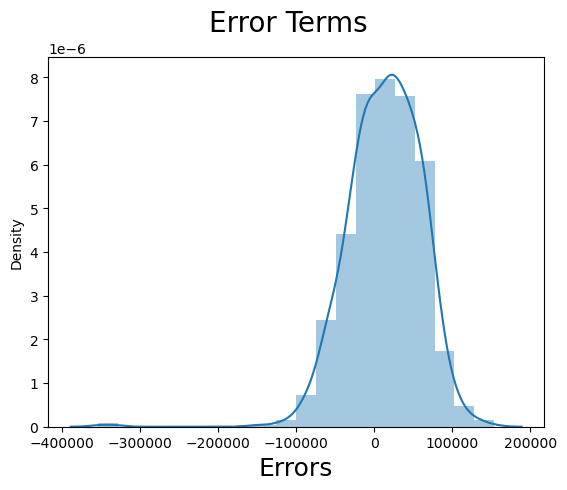

In [626]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [845]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.62

In [846]:
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

2439230362419.9297
2389060100.313349
48878.012442338004


In [847]:
y_res = (y_train - y_train_cnst)

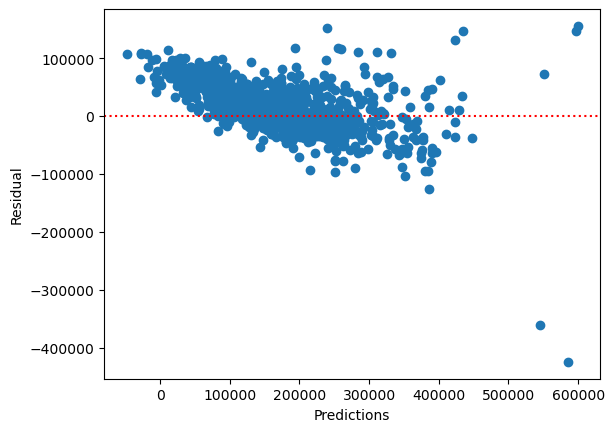

In [848]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [849]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Fa

In [850]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,-0.032377,-0.068902,0.025916,-0.033111,-0.019212,-0.050044,0.026373,-0.010664,-0.016811,-0.091341,-0.030499,-0.012195,0.038505,0.042261,-0.105435,0.001920,0.027773,0.075129,0.049396,0.003095,-0.020822,0.015445,0.042849,-0.018849,-0.067836,-0.054609,0.066047,0.058699,-0.030043,0.039931,181645.895216,0.005526,0.045558,0.006834,0.794989,0.145786
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,0.935148,0.798998,0.949447,0.844311,0.949066,0.902588,1.009237,1.029982,0.961083,0.956973,0.966692,0.995798,1.014870,0.983782,0.846603,1.024904,1.042020,0.993950,0.973170,0.990890,1.006806,1.026307,1.023814,1.004550,0.887293,0.638820,1.280055,1.477231,0.348993,0.945506,80320.777267,0.991060,0.208763,0.082477,0.404171,0.353294
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,-0.964030,-0.293313,-1.256903,-2.314361,-2.208049,-2.098584,-0.789230,-0.124502,-2.227567,-0.837450,-0.247791,-2.840982,-0.753316,-3.484694,-4.580922,-2.293993,-2.806960,-0.927153,-0.985354,-4.106758,-2.375841,-2.225247,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-1.925187,37900.000000,-1.203301,0.000000,0.000000,0.000000,0.000000
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.688366,-0.542629,-1.181447,-0.680437,-0.789230,-0.124502,-0.747101,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.198233,-1.034916,-0.641156,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,132000.000000,-0.972515,0.000000,0.000000,1.000000,0.000000
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,-0.187498,-0.293313,-0.142124,-0.172157,-0.154845,-0.202692,-0.789230,-0.124502,-0.116915,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.238898,0.306009,-0.009406,-0.744598,-0.348159,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,165000.000000,-0.049373,0.000000,0.000000,1.000000,0.000000
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,0.555693,-0.293313,0.546809,0.405345,0.871757,0.434720,0.914249,-0.124502,0.520795,1.066863,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,0.622148,1.206469,0.291653,0.306009,0.490337,0.702136,0.279079,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,213075.000000,0.577044,0.000000,0.000000,1.000000,0.000000
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,3.742487,6.306447,3.057292,3.186070,0.871757,3.408051,2.861246,11.746585,3.931322,2.971177,8.047130,2.597723,3.242196,3.836032,8.459379,2.259799,3.424626,2.171449,1.754425,0.309238,1.646935,3.658517,5

In [851]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [852]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_190', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_Stucco', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

In [853]:
# Using model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [854]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new.astype(int)).fit()

#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     76.51
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          3.78e-123
Time:                        17:15:23   Log-Likelihood:                -5251.7
No. Observations:                 439   AIC:                         1.054e+04
Df Residuals:                     419   BIC:                         1.063e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.746e+05   1.31e+04     13.328      0.000    1.49e+05       2e+05
OverallQual           4.562e+04   4011.702     11.372      0.000    3.77e+04    5.35e+04
BsmtExposure          1.738e+04   3471.935      5.007      0.000    1.06e+04    2.42e+04
1stFlrSF              3.337e+04   3620.070      9.218      0.000    2.63e+04    4.05e+04
2ndFlrSF              4.703e+04   3987.772     11.793      0.000    3.92e+04    5.49e+04
MSSubClass_90        -3.313e+04   1.29e+04     -2.572      0.010   -5.85e+04   -7807.800
MSSubClass_120       -9787.9341   8987.276     -1.089      0.277   -2.75e+04    7877.831
MSSubClass_190          -9.2986   1.78e+04     -0.001      1.000    -3.5e+04     3.5e+04
MSZoning_RL            389.5681   1.25e+04      0.031      0.975   -2.43e+04     2.5e+04
MSZoning_RM          -1.909e+04   1.33e+04     -1.432      0.153   -4.53e+04    7106.431
Neighborhood_ClearCr  6718.3249   1.45e+04      0.465      0.642   -2.17e+04    3.51e+04
Neighborhood_NoRidge  7.041e+04   1.63e+04      4.310      0.000    3.83e+04    1.03e+05
Neighborhood_NridgHt  5.784e+04   1.06e+04      5.467      0.000     3.7e+04    7.86e+04
Neighborhood_Somerst  1.255e+04   1.27e+04      0.986      0.325   -1.25e+04    3.76e+04
Neighborhood_Veenker -8.785e-12    3.8e-12     -2.315      0.021   -1.62e-11   -1.32e-12
Exterior1st_AsphShn   3.001e-12   1.38e-12      2.173      0.030    2.87e-13    5.72e-12
Exterior1st_BrkComm   5.662e-12   9.08e-12      0.623      0.533   -1.22e-11    2.35e-11
Exterior2nd_AsphShn   1.411e+04   2.78e+04      0.508      0.612   -4.06e+04    6.88e+04
Exterior2nd_BrkFace  -6213.0847   1.33e+04     -0.468      0.640   -3.23e+04    1.99e+04
Exterior2nd_Stucco    1695.1505   1.62e+04      0.105      0.917   -3.01e+04    3.35e+04
GarageFinish_NA      -4.463e+04   9961.136     -4.481      0.000   -6.42e+04   -2.51e+04
GarageFinish_RFn     -1.718e+04   5338.065     -3.219      0.001   -2.77e+04   -6689.808
GarageFinish_Unf     -2.411e+04   5615.332     -4.294      0.000   -3.52e+04   -1.31e+04
==============================================================================
Omnibus:                       91.906   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.662
Skew:                           0.946   Prob(JB):                     1.03e-64
Kurtosis:                       6.540   Cond. No.                     1.02e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.25e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [855]:
y_pred = lm.predict(X_test_new)

In [856]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.6

In [857]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1140972626339.7522
2599026483.689641
50980.648129360234


In [858]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(int), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Exterior2nd_AsphShn,inf
14,Exterior1st_AsphShn,inf
7,MSZoning_RL,4.41
21,GarageFinish_Unf,3.31
20,GarageFinish_RFn,2.10
8,MSZoning_RM,1.98
0,OverallQual,1.90
1,BsmtExposure,1.58
3,2ndFlrSF,1.53
19,GarageFinish_NA,1.44


Text(0, 0.5, 'y_pred')

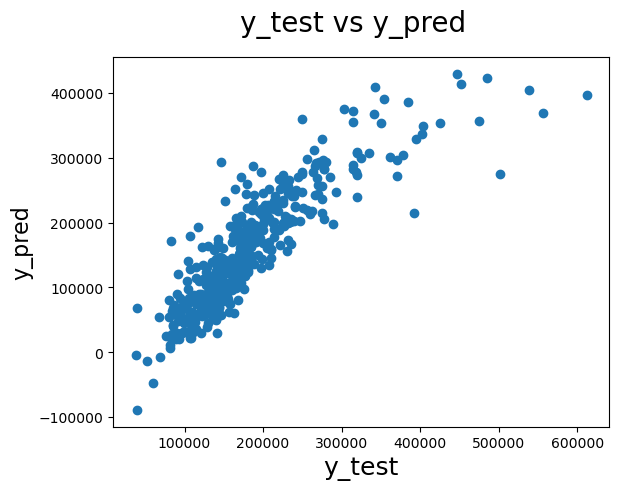

In [859]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [860]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_190', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_Stucco', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

In [861]:
# result dataframe 
final_df = house_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head().astype(int)

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [862]:
final_df.shape

(1460, 21)

#### Final evalution
No of Variables = 21 i.e. OverallQual,BsmtUnfSF, TotalBsmtSF,1stFlrSF, 2ndFlrSF, MSSubClass_90, MSSubClass_160, MSZoning_RL, LotShape_IR3, LotConfig_CulDSac, Neighborhood_Crawfor , Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Veenker, Exterior1st_ImStucc, Exterior1st_Stucco, Exterior2nd_CmentBd , Exterior2nd_ImStucc, Exterior2nd_VinylSd

r2 score for Train Data set model = 0.62
r2 score for Test Data set model = 0.61

In [863]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.6177867112512213
0.5962195295956642
2439230362419.9297
1140972626339.7522
2389060100.313349
2599026483.689641


In [864]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [865]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [866]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 28079.87644394  11459.73253928  26712.93786834  19630.20337255
 -19200.12082183  -9034.59571271 -13474.77206996  12657.73964427
  -3557.13860493   9329.80065137  50763.24918882  46712.90239857
  27980.05868515  15807.64085444  -5061.37572941  -8558.57190568
  -5061.37572941  11544.51597819 -14926.53602299 -19999.81382122
 -13374.70444457 -17173.35374361]


In [868]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [869]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [870]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [871]:
lasso.coef_

array([ 27267.62947462,  11539.67541608,  26538.57942931,  19460.9702518 ,
       -19395.47818896,  -8266.94157182, -12180.27090493,  15621.957009  ,
           -0.        ,   7546.26045772,  58906.9888831 ,  51633.81947394,
        32800.91405658,  16583.47585014,     -0.        ,     -0.        ,
           -0.        ,   9559.04390342, -13469.83262091, -20602.28937279,
       -13419.96360909, -17155.92911456])

In [882]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8037790903099333
0.5962195295956642
1252253688574.0312
1140972626339.7522
1226497246.399639
2599026483.689641


In [883]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8112042511117101
0.5962195295956642
1204867377823.7305
1140972626339.7522
1180085580.63049
2599026483.689641


In [884]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),6.177867e-01,8.037791e-01,8.112043e-01
1,R2 Score (Test),5.962195e-01,5.962195e-01,5.962195e-01
2,RSS (Train),2.439230e+12,1.252254e+12,1.204867e+12
3,RSS (Test),1.140973e+12,1.140973e+12,1.140973e+12
4,MSE (Train),4.887801e+04,3.502138e+04,3.435237e+04
5,MSE (Test),5.098065e+04,5.098065e+04,5.098065e+04


In [885]:
betas = pd.DataFrame(index=X.columns)

In [886]:
betas.rows = X.columns

In [887]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [888]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,34299.011067,30394.093486,27267.629475
BsmtExposure,17598.805658,11408.778830,11539.675416
1stFlrSF,26666.763237,26717.806930,26538.579429
2ndFlrSF,38216.881259,19594.602953,19460.970252
MSSubClass_90,-22745.998591,-14969.321806,-19395.478189
MSSubClass_120,-7754.731943,-6404.403358,-8266.941572
MSSubClass_190,-14518.746785,-9519.050317,-12180.270905
MSZoning_RL,16910.233213,9254.187399,15621.957009
MSZoning_RM,3002.739841,-7521.443726,-0.000000
Neighborhood_ClearCr,22880.300026,5718.998833,7546.260458


Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [896]:
alpha = 12
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred)
print(r2_test_lr)

[ 29299.55380912  11442.23207783  26741.38620049  19629.36794024
 -17146.16096088  -7696.54809252 -11443.13835943  10545.64848763
  -6046.67038132   7327.22330593  42821.91241554  40496.63001381
  22860.40108732  11291.52147499  -3124.30842711  -4745.77432554
  -3124.30842711   9135.28216111 -12587.57167994 -17606.28869142
 -11935.93263582 -16077.56789919]
0.8076774098240656
0.5962195295956642


r2 train score has dropped from 0.810 to 0.807

In [897]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred)
print(r2_test_lr)

[ 28232.32900748  11610.85844134  26536.89369256  19319.29545911
 -16832.11126851  -5604.55744714  -8184.13820915  14540.98375507
  -1166.31405887   2127.0330676   55146.34977548  47557.27992501
  29094.8956875    7375.44191728     -0.             -0.
     -0.           3869.30037276  -8787.16565407 -17829.89375058
 -11592.09002777 -15684.77413958]
0.8087598575260609
0.5962195295956642


In [898]:
lasso_coef_ = np.exp(betas['Lasso'])
lasso_coef_.sort_values(ascending=False)[:10]

OverallQual             inf
Neighborhood_ClearCr    inf
Exterior2nd_BrkFace     inf
Neighborhood_Veenker    inf
Neighborhood_Somerst    inf
BsmtExposure            inf
Neighborhood_NoRidge    inf
Neighborhood_NridgHt    inf
MSZoning_RL             inf
2ndFlrSF                inf
Name: Lasso, dtype: float64

###### Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

predictor variables after we double the alpha values are:
Neighborhood_ClearCr    inf
Exterior2nd_BrkFace     inf
Neighborhood_Veenker    inf
Neighborhood_Somerst    inf
BsmtExposure            inf

##### Question2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?


Model to be chosen depend on a use case.
Lasso is to be used if there are too many variables and our goal is feature selection 
Ridge Regression is to be used if no large coefficients and reduction of coefficient value is goals.

##### Question3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [899]:
betas['Lasso'].sort_values(ascending=False)[:5]

Neighborhood_NoRidge    58906.988883
Neighborhood_NridgHt    51633.819474
Neighborhood_Somerst    32800.914057
OverallQual             27267.629475
1stFlrSF                26538.579429
Name: Lasso, dtype: float64

###### Question 4: How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Non-robust models can lead to severe consequences, such as financial losses or compromised safety. Achieving robustness often involves a trade-off with accuracy. While aiming for high accuracy on a specific dataset is tempting, it can lead to overfitting or lack of generalization to new data. It ensures that the model can handle diverse inputs or circumstances. Train and validate the model on the first two subsets and evaluate its performance on the unseen test data.

Robustness ensures reliability, while accuracy ensures good performance on the validation set.